In [622]:
import pandas as pd
import numpy as np

### 2) Treatement of Train_df

In [627]:
train_df = pd.read_csv("train.csv")
train_df

# Informations about train_df
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 You can see we have the data contains nulls . I'm gonna treat data with the fuction gonna move the columns have plus 250 
data with null and the rest I'm gonna fill if this columns is the numerical columns fill with the 0 else fill with empty

In [743]:
def clean_and_transform_nan(df):
    # 1️ Move the columns have plus 250 nulls
    nan_counts = train_df.isnull().sum()
    cols_to_drop = nan_counts[nan_counts > 250].index
    train_df.drop(columns=cols_to_drop, inplace=True)

    # 2️ Fill the rest Null : if is the categorical Columns fill with empty else 0
    for col in train_df.columns:
        if train_df[col].isnull().any():  # Check if have a null columns
            if train_df[col].dtype == 'object':  # Categorical Columns
                train_df[col].fillna('Empty', inplace=True)
            else:  # Colonne numérique
                train_df[col].fillna(0, inplace=True)

    return df

train_df = clean_and_transform_nan(train_df)
print(train_df.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    20

In [701]:
train_df.shape
nulls_test_counts = train_df.isnull().sum().sort_values(ascending=False)
print(nulls_test_counts.head(20))

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageFinish    0
MSSubClass      0
dtype: int64


### 3)Treatment of test_df

In [687]:
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


This is gonna be same process with the prev

In [735]:
def clean_and_transform_nan(test_df):
    # 1️ Move Columns with have plus 250 nulls
    nan_counts = test_df.isnull().sum()
    cols_to_drop = nan_counts[nan_counts > 250].index
    test_df.drop(columns=cols_to_drop, inplace=True)

    # 2️ fill the rest Nan : 'Empty' if is the categorical else 0
    for col in test_df.columns:
        if test_df[col].isnull().any():  # check if have again the Nan
            if test_df[col].dtype == 'object':  # Categorical Columns
                test_df[col].fillna('Empty', inplace=True)
            else:  # Colonne numérique
                test_df[col].fillna(0, inplace=True)

    return test_df

df_cleaned = clean_and_transform_nan(test_df)
print(test_df.head())
print(test_df.info())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    AllPub    Inside  ...           0             0         0   
1         Lvl    AllPub    Corner  ...          36             0         0   
2         Lvl    AllPub    Inside  ...          34             0         0   
3         Lvl    AllPub    Inside  ...          36             0         0   
4         HLS    AllPub    Inside  ...          82             0         0   

  ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         120        0       0      

In [741]:
# Checking again if we have the null values after the treatment
nulls_test_counts = test_df.isnull().sum().sort_values(ascending=False)
print(nulls_test_counts.head(20))
test_df.shape

Id              0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
Fireplaces      0
GarageYrBlt     0
MSSubClass      0
dtype: int64


(1459, 74)

In [745]:
print(train_df["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### 6) Assumptions and sampling Test

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-3.02577711, -2.82720955, -2.76682295, ...,  2.80783885,
          2.80943143,  3.0400152 ])),
 (0.970904730626001, 0.010860792982758109, 0.9997827098969779))

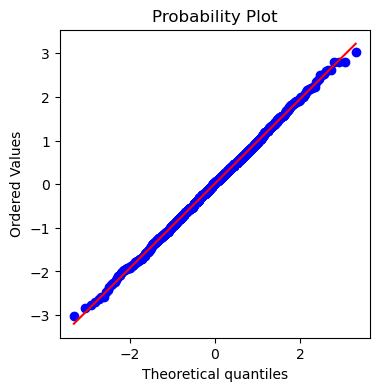

In [747]:
import scipy.stats as stats

#Normal Distribution
fig, ax = plt.subplots(figsize=(4,4))
norm_apple = stats.norm.rvs(size=len(train_df["SalePrice"]))
stats.probplot(norm_apple,plot=ax)

In [644]:
# Apply the Kolmogorov-Smirnov test
ks_statistic, p_value_ks = stats.kstest(train_df['SalePrice'], 'norm')

print(f"Kolmogorov-Smirnov test: stat={ks_statistic:.4f}, p-value={p_value_ks:.4e}")

if p_value_ks > 0.05:
    print("The data follow the normal Distribution (It's accept H0).")
else:
    print("The data don't follow the normal distribution (we reject H0).")

Kolmogorov-Smirnov test: stat=1.0000, p-value=0.0000e+00
The data don't follow the normal distribution (we reject H0).


### 8) Training Model with GradientBoosting

In [649]:
# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [659]:
# 1) Extract the match data or Features
features = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = train_df[features]
y = train_df["SalePrice"]

# 2) Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [777]:
# Hyperparameters
gb_model = GradientBoostingRegressor(
    n_estimators=500,          # Estimators
    learning_rate=0.03,         # Rate to learn
    max_depth=5,                # Mean deep 
    min_samples_split=5,        # ÉAvoid to tailored for the noise
    min_samples_leaf=5,         # RReduce to risk for the model to overshiftting
    subsample=0.9,              # Partial Using for data
    max_features='sqrt',        #Random Selection 
    random_state=1
)

# Train the model
gb_model.fit(X_train, y_train)

# 🔍 Predictions
y_pred_test = gb_model.predict(X_test)

# Evaluation

mse_ = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Show the results
print("-"*15,"Metrics of models","-"*15)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


--------------- Metrics of models ---------------
MSE: 1035143419.28, R²: 0.87, MAE: 21016.09, RMSE: 32173.64


In [781]:
#  Median Error Calculation

# Calculate the median sale price from the training dataset
median_price = train_df["SalePrice"].median()

# Compute the median error as a percentage of the median price
error_median = (mae / median_price) * 100

# Print the result
print(f"The error median price is: {error_median:.2f}%")

#  Conditional Check: Is the error below 15%?
if error_median < 15:
    print("✅ The model's median error is below 15%, which indicates high accuracy.")
else:
    print("⚠️ The median error exceeds 15%. Consider further optimization to improve model performance.")

The error median price is: 12.89%
✅ The model's median error is below 15%, which indicates high accuracy.


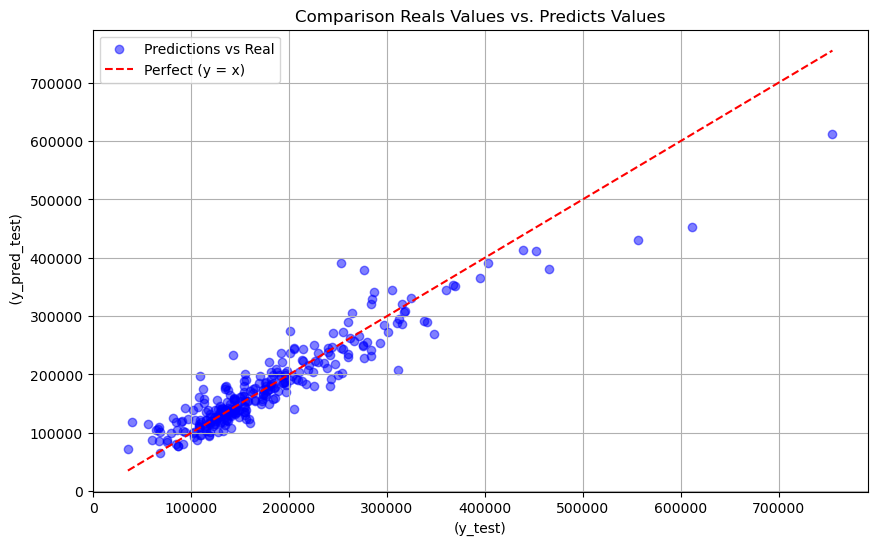

In [723]:
import matplotlib.pyplot as plt

# 🔍 Comparaison des valeurs réelles vs. prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue", label="Predictions vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect (y = x)")

plt.xlabel("(y_test)")
plt.ylabel(" (y_pred_test)")
plt.title("Comparison Reals Values vs. Predicts Values")
plt.legend()
plt.grid(True)
plt.show()

In [663]:
X_test_df = test_df[features]

y_pred_test_df = gb_model.predict(X_test_df)


In [667]:
# Create a datafrmae with the predictions
Sales_price_df = pd.DataFrame({"ID":test_df.Id,"SalePrice":y_pred_test_df})

# Writing 
print(Sales_price_df)
Sales_price_df.to_csv("submission_df1.csv", index =False)


        ID      SalePrice
0     1461  129808.111379
1     1462  158329.468342
2     1463  187528.979702
3     1464  186352.552186
4     1465  179117.479759
...    ...            ...
1454  2915   89691.909290
1455  2916   88885.987837
1456  2917  151917.820321
1457  2918  146892.880343
1458  2919  227088.629073

[1459 rows x 2 columns]
